# Round 1
## Trade objective
Today is a special day. Representatives from three other archipelagos are visiting to trade their currencies with us. You can trade Wasabi roots with Sing the Songbird, Pizza slices with Devin the Duck and Snowballs with Pam the Penguin.

Your objective is to trade these currencies and maximize your profit in SeaShells. The number of trades is limited to 5. You must begin your first trade and end your last trade with our own currency; SeaShells. Use the trading table to develop your trading strategy and use the drop down fields to translate your strategy into actionable input. Once you are satisfied with your strategy and input, use the “Submit manual trade” button to lock it in.

Note that you can (re)submit new strategies as long as the round is still in progress. As soon as the round ends, the trading strategy that was submitted last will be processed.

Good luck and have fun trading!

![Trading Table](round_1_trading_table.jpg)

![Your Strategy](round_1_your_strategy_empty.jpg)

## My Solution
Model as a graph problem
Single source, shortest-path problem from (Seashells, 2) to (Seashells, X) within 4 walks
Shortest path with k edges

Create dummy source node
create dummy end node

Dijkstras with negative edges only, and no cycle, since we reduce by 1 hop each time

In [1]:
import functools

import networkx as nx
import matplotlib.pyplot as plt
import math
import functools

In [2]:
currencies = ["Pizzas", "Wasabi", "Snowballs", "Seashells"]

trading_table = {"Pizzas": {"Pizzas": 1, "Wasabi": 0.5, "Snowballs": 1.45, "Seashells": 0.75},
                 "Wasabi": {"Pizzas": 1.95, "Wasabi": 1, "Snowballs": 3.1, "Seashells": 1.49},
                 "Snowballs": {"Pizzas": 0.67, "Wasabi": 0.31, "Snowballs": 1, "Seashells": 0.48},
                 "Seashells": {"Pizzas": 1.34, "Wasabi": 0.64, "Snowballs": 1.98, "Seashells": 1}}

G = nx.DiGraph()
G.add_nodes_from((currency, i) for currency in ["Pizzas", "Snowballs", "Wasabi"] for i in range(4, 0, -1))
G.add_nodes_from(("Seashells", i) for i in range(0, 6))

for currency, trades_remaining in G.nodes:
    if trades_remaining == 0:
        continue
    elif trades_remaining == 1:
        G.add_edge((currency, trades_remaining), ("Seashells", 0), weight= -math.log(trading_table[currency]["Seashells"]))
    else:
        for curr in currencies:
            G.add_edge((currency, trades_remaining), (curr, trades_remaining - 1), weight= -math.log(trading_table[currency][curr]))

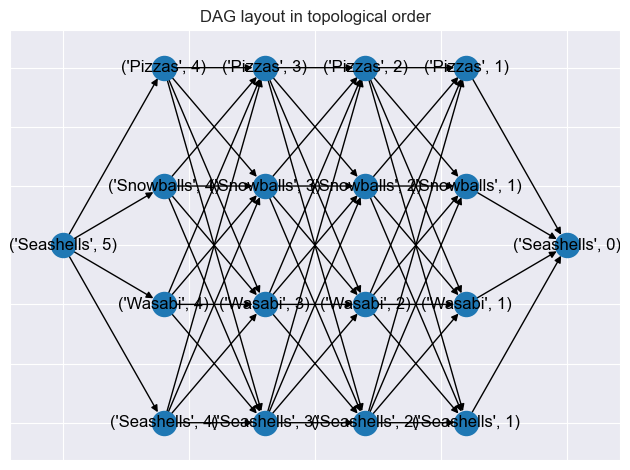

In [42]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

In [65]:
best_path = nx.bellman_ford_path(G, ("Seashells", 5), ("Seashells", 0))
expected_arbitrage = math.exp(-nx.bellman_ford_path_length(G, ("Seashells", 5), ("Seashells", 0)))
actual_arbitrage = functools.reduce(lambda x, y: x * y, (trading_table[best_path[i][0]][best_path[i+1][0]] for i in range(len(best_path) - 1)))
starting_amount = 2000000
print(best_path)
print(f"Expected Arbitrage: {expected_arbitrage}, Actual Arbitrage: {actual_arbitrage}")
print(f"Starting Amount: {starting_amount} seashells, After Trades: {starting_amount * actual_arbitrage}")

[('Seashells', 5), ('Pizzas', 4), ('Wasabi', 3), ('Snowballs', 2), ('Pizzas', 1), ('Seashells', 0)]
Expected Arbitrage: 1.0436925000000004, Actual Arbitrage: 1.0436925000000001
Starting Amount: 2000000 seashells, After Trades: 2087385.0000000002


In [66]:
1.34 * 0.5 * 3.1 * 0.67 * 0.75

1.0436925000000001